# Project description
Operator Megaline
offers its clients two prepaid plans, Surf and Ultimate. The commercial
department wants to know which of the plans is more profitable in order to
adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a
relatively small client selection. You'll have the data on 500 Megaline clients:
who the clients are, where they're from, which plan they use, and the number
of calls they made and text messages they sent in 2018. Your job is **to analyze
clients' behavior and determine which prepaid plan is more profitable.**

## Project plan
Megaline rounds seconds up to minutes, and megabytes to
gigabytes. For calls, each individual call is rounded up: even if the call lasted
just one second, it will be counted as one minute. For web traffic, individual
web sessions are not rounded up. Instead, the total for the month is rounded
up. If someone uses 1025 megabytes this month, they will be charged for 2
gigabyes.
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes.
For calls, each individual call is rounded up: even if the call lasted just one
second, it will be counted as one minute. For web traffic, individual web
sessions are not rounded up. Instead, the total for the month is rounded up. If
someone uses 1025 megabytes this month, they will be charged for 2
gigabytes.<br>
Surf<br>
Monthly charge: 20 dollars
500 monthly minutes, 50 texts, and 15 GB of data<br>
After exceeding the package limits:<br>
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: 10 dollars

Ultimate<br>
Monthly charge: 70 dollars
3000 monthly minutes, 1000 text messages, and 30 GB of data<br>
After exceeding the package limits:<br>
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: 7 dollars

### [I. Data preprocessing](#I-Data-preprocessing)
#### 1. Open the data file and study the general information
#### [2. Identify and study missing values, duplicates](#2-Identify-and-study-missing-values-and-duplicates)
Convert the data to the necessary types<br>
Find and eliminate errors in the data<br>
Explain what errors you found and how you eliminated them.<br>

#### [3. Adding to the table:](#3-Adding-to-the-table)
For each user, find:<br>
The number of calls made and minutes used per month<br>
The number of text messages sent per month<br>
The volume of data per month<br>

The monthly profit from each user (subtract the free package limit from
the total number of calls, text messages, and data; multiply the result by
the calling plan value; add the monthly charge depending on the calling
plan)

### [II. Exploratory Data Analysis](#II-Exploratory-Data-Analysis)
#### 1. Study the following parameters: 
Describe the customers' behavior. Find the minutes, texts, and volume of data
the users of each plan require per month. Calculate the mean, variance, and
standard deviation. Plot histograms. Describe the distributions.

#### [2. Test the hypotheses](#2-Test-the-hypotheses)
The average profit from users of Ultimate and Surf calling plans differs.
The average profit from users in NYNJ area is different from that of the
users from other regions.
You decide what alpha value to use.
#### [3. Hypotheses explaination](#3-Hypotheses-explaination)
How you formulated the null and alternative hypotheses.
What criterion you used to test the hypotheses and why.
### [III. Conclusion](#III-Conclusion)

# I Data preprocessing
#### 1. Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
import math

def unpack_data(a,b):
    try:
        data = pd.read_csv(a)
        return data
    except:
        data = pd.read_csv(b)
        return data
df_calls=unpack_data('/datasets/megaline_calls.csv','C:\\Users\\test\\Desktop\\Projects\\Data_analytics\\Mobile_plans_profitability\\megaline_calls.csv')
df_internet=unpack_data('/datasets/megaline_internet.csv','C:\\Users\\test\\Desktop\\Projects\\Data_analytics\\Mobile_plans_profitability\\megaline_internet.csv')
df_messages=unpack_data('/datasets/megaline_messages.csv','C:\\Users\\test\\Desktop\\Projects\\Data_analytics\\Mobile_plans_profitability\\megaline_messages.csv')
df_plans=unpack_data('/datasets/megaline_plans.csv', 'C:\\Users\\test\\Desktop\\Projects\\Data_analytics\\Mobile_plans_profitability\\megaline_plans.csv')
df_users=unpack_data('/datasets/megaline_users.csv','C:\\Users\\test\\Desktop\\Projects\\Data_analytics\\Mobile_plans_profitability\\megaline_users.csv')

### 2 Identify and study missing values and duplicates

In [2]:
#checked whether the year is unique and added column month to the dataframe df_calls
#df_calls['year']=pd.DatetimeIndex(df_calls['call_date']).year
#print(df_calls['year'].unique())
df_calls['month'] = pd.to_datetime(df_calls['call_date'], format='%d/%m/%Y')
df_calls['month'] = pd.DatetimeIndex(df_calls['month']).month

In [3]:
#rounded up the duration of the calls as they the cost is calculate as seconds rounded up to the minute
df_calls.head(10)
df_calls['total_calls'] = df_calls['duration'].apply(np.ceil)
df_calls.head(10)

,id,user_id,call_date,duration,month,total_calls
0,1000_93,1000,27/12/2018,8.52,12,9.0
1,1000_145,1000,27/12/2018,13.66,12,14.0
2,1000_247,1000,27/12/2018,14.48,12,15.0
3,1000_309,1000,28/12/2018,5.76,12,6.0
4,1000_380,1000,30/12/2018,4.22,12,5.0
5,1000_388,1000,31/12/2018,2.20,12,3.0
6,1000_510,1000,27/12/2018,5.75,12,6.0
7,1000_521,1000,28/12/2018,14.18,12,15.0
8,1000_530,1000,28/12/2018,5.77,12,6.0
9,1000_544,1000,26/12/2018,4.40,12,5.0


<span style='color:blue'>now we calculate the total minites of calls per user per month</span>

In [4]:

df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='total_calls', aggfunc = 'sum').reset_index()
df_calls_pivot.head()

,user_id,month,total_calls
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


<span style='color:blue'>now we can calculate internet traffic per user per month</span>

In [5]:

df_internet.info()
df_internet['month'] = pd.to_datetime(df_internet['session_date'], format='%d/%m/%Y')
df_internet['month'] = pd.DatetimeIndex(df_internet['month']).month
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used,month
0,1000_13,1000,29/12/2018,89.86,12
1,1000_204,1000,31/12/2018,0.00,12
2,1000_379,1000,28/12/2018,660.40,12
3,1000_413,1000,26/12/2018,270.99,12
4,1000_442,1000,27/12/2018,880.22,12


In [6]:
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values = 'mb_used', aggfunc='sum').reset_index()
df_internet_pivot.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [7]:
df_messages.info()
df_messages.head()
#same story with messages, but in pivot the aggfunc will be count
df_messages['month'] = pd.to_datetime(df_messages['message_date'], format='%d/%m/%Y')
df_messages['month'] = pd.DatetimeIndex(df_messages['month']).month
df_messages_pivot = df_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
df_messages_pivot=df_messages_pivot.rename(columns = {'id':'messages'}).reset_index()
df_messages_pivot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [8]:
df_users.head()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<span style='color:blue'>now we have 3 DataFrames to merge by user_id and month</span>

In [10]:

from functools import reduce
data_frames = [df_calls_pivot, df_internet_pivot, df_messages_pivot]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames).fillna(0)


print(len(df_merged))
df_merged.head()

2293


,user_id,month,total_calls,mb_used,messages
0,1000,12,124.0,1901.47,11.0
1,1001,8,182.0,6919.15,30.0
2,1001,9,315.0,13314.82,44.0
3,1001,10,393.0,22330.49,53.0
4,1001,11,426.0,18504.30,36.0


<span style='color:blue'>all data including infomation on the users is in one dataframe:</span>

In [11]:
total=pd.merge(left = df_merged, right = df_users, how='outer', on=['user_id']).fillna(0)
total.head()
print(len(total))

2303


In [12]:
df_plans=df_plans.rename(columns = {'plan_name':'tariff'})
total=pd.merge(left = total, right = df_plans, how='outer', on=['tariff']).fillna(0)
total.head()
# total.info()
#print(len(total))

,user_id,month,total_calls,mb_used,messages,first_name,last_name,age,city,reg_date,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24/12/2018,ultimate,0,1000,30720,3000,70,7,0.01,0.01
1,1006,11.0,10.0,2068.37,15.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",27/11/2018,ultimate,18/12/2018,1000,30720,3000,70,7,0.01,0.01
2,1006,12.0,59.0,32118.82,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",27/11/2018,ultimate,18/12/2018,1000,30720,3000,70,7,0.01,0.01
3,1008,10.0,476.0,17106.99,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",03/08/2018,ultimate,0,1000,30720,3000,70,7,0.01,0.01
4,1008,11.0,446.0,23676.72,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",03/08/2018,ultimate,0,1000,30720,3000,70,7,0.01,0.01


### 3 Adding to the table

<span style='color:blue'>let us calculate the profitability of the users</span>

In [16]:

def profit(total):
    calls=total['total_calls']
    mb=total['mb_used']
    messages=total['messages']
    calls_lim=total['minutes_included']
    mb_lim=total['mb_per_month_included']
    messages_lim=total['messages_included']
    monthly_pay=total['usd_monthly_pay']
    calls_pay=total['usd_per_minute']
    messages_pay=total['usd_per_message']
    mb_pay=total['usd_per_gb']
    
    if calls>calls_lim:
        add_calls = (calls-calls_lim)*calls_pay
    else:
        add_calls=0
    try:
        if mb>mb_lim:
           add_mb = mb_pay*(math.ceil(mb-mb_lim))/1000
        else:
           add_mb=0
    except:
        add_mb=0
    
    if messages>messages_lim:
        add_messages=(messages-messages_lim)*messages_pay
    else:
        add_messages=0
    total_cost = monthly_pay+add_calls+add_mb+add_messages
    return total_cost
    

In [17]:
total['total_cost']=total.apply(profit,axis=1)
total.sample(10)

,user_id,month,total_calls,mb_used,messages,first_name,last_name,age,city,reg_date,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
189,1132,5.0,769.0,30169.84,149.0,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",14/04/2018,ultimate,0,1000,30720,3000,70,7,0.01,0.01,70.00
1236,1160,7.0,601.0,15954.60,17.0,Steven,Morgan,44,"Portland-Vancouver-Hillsboro, OR-WA MSA",05/02/2018,surf,0,50,15360,500,20,10,0.03,0.03,28.98
961,1079,9.0,636.0,17984.35,97.0,Brian,Mccall,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",26/01/2018,surf,0,50,15360,500,20,10,0.03,0.03,51.74
295,1199,8.0,394.0,13361.35,80.0,Antonetta,Finley,39,"San Antonio-New Braunfels, TX MSA",01/08/2018,ultimate,0,1000,30720,3000,70,7,0.01,0.01,70.00
1668,1299,10.0,462.0,15037.31,7.0,Keitha,Harrison,64,"New York-Newark-Jersey City, NY-NJ-PA MSA",19/01/2018,surf,0,50,15360,500,20,10,0.03,0.03,20.00
1611,1281,11.0,740.0,7094.43,45.0,Zack,Hardy,39,"Charlotte-Concord-Gastonia, NC-SC MSA",23/07/2018,surf,14/11/2018,50,15360,500,20,10,0.03,0.03,27.20
1229,1157,9.0,530.0,10238.27,0.0,Luciano,Sheppard,63,"Los Angeles-Long Beach-Anaheim, CA MSA",02/07/2018,surf,0,50,15360,500,20,10,0.03,0.03,20.90
2057,1411,8.0,255.0,8987.55,0.0,Man,Fleming,64,"Rochester, NY MSA",10/08/2018,surf,0,50,15360,500,20,10,0.03,0.03,20.00
1184,1145,10.0,343.0,23605.38,71.0,Venice,Brooks,29,"San Jose-Sunnyvale-Santa Clara, CA MSA",12/04/2018,surf,0,50,15360,500,20,10,0.03,0.03,103.09
1673,1300,12.0,436.0,24325.88,0.0,Rene,Frost,23,"New York-Newark-Jersey City, NY-NJ-PA MSA",21/10/2018,surf,19/12/2018,50,15360,500,20,10,0.03,0.03,109.66


### Conclusions on section I

We have explored the data, merged the necessary columns and figured out the profitability per each month, per user. Now let's analyse the data and test the hypotheses.

## II Exploratory Data Analysis
#### 1. Study the following parameters:

<span style='color:blue'>we shall find the mean, variance and standard deviation on each of the parameters calls, messages and mbs</span>

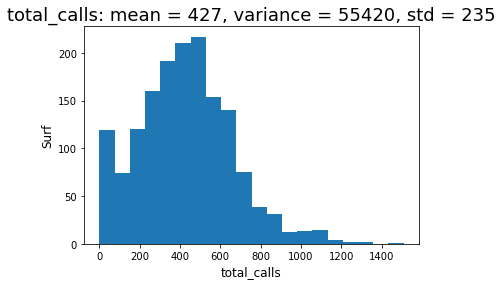

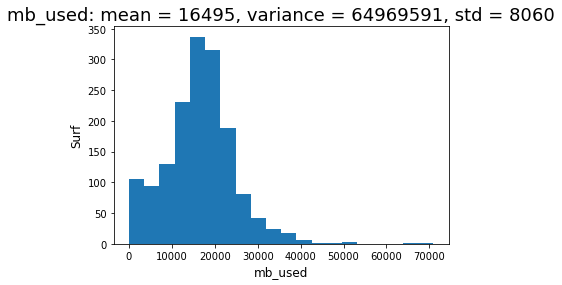

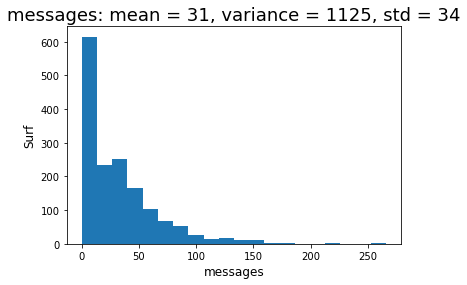

In [18]:

from scipy import stats as st
categories = ['total_calls','mb_used','messages']
graph_db =total.query('tariff=="surf"').loc[:, categories]
for i in graph_db._get_numeric_data().columns:
    mean = graph_db[i].mean()
    var = np.var(graph_db[i])
    std = np.std(graph_db[i])
    plt.hist(graph_db[i],bins=20)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Surf",fontsize=12)
    plt.title(i+': mean = {:.0f}'.format(mean)+', variance = {:.0f}'.format(var)+', std = {:.0f}'.format(std), fontsize=18)
    plt.show()

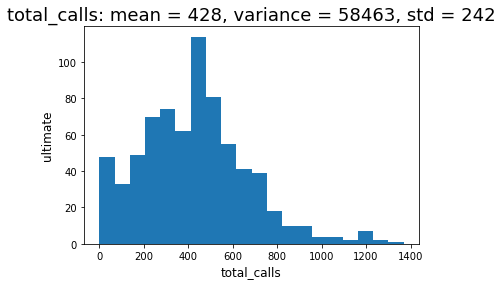

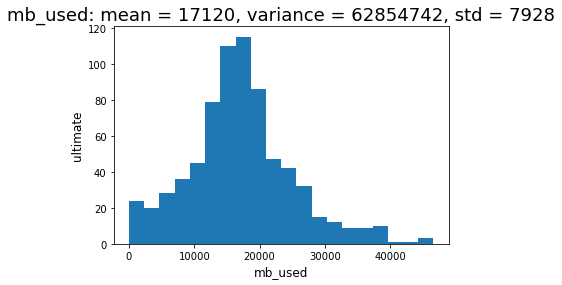

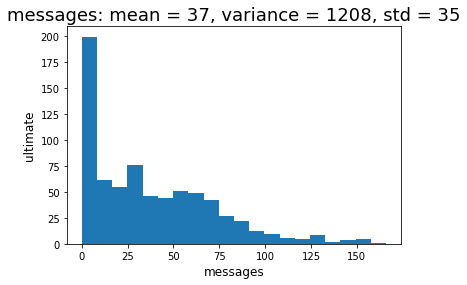

In [19]:
graph_db =total.query('tariff=="ultimate"').loc[:, categories]
for i in graph_db._get_numeric_data().columns:
    mean = graph_db[i].mean()
    var = np.var(graph_db[i])
    std = np.std(graph_db[i])
    plt.hist(graph_db[i],bins=20)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("ultimate",fontsize=12)
    plt.title(i+': mean = {:.0f}'.format(mean)+', variance = {:.0f}'.format(var)+', std = {:.0f}'.format(std), fontsize=18)
    plt.show()

58.3841101963268 55.07497344543819 37.52


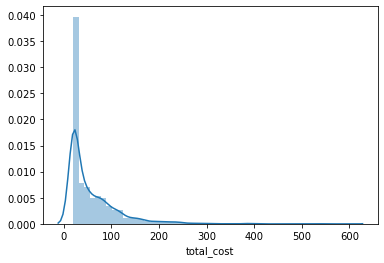

In [20]:
sns.distplot(total.query('tariff=="surf"')['total_cost'])
print(total.query('tariff=="surf"')['total_cost'].mean(),total.query('tariff=="surf"')['total_cost'].std(),
      total.query('tariff=="surf"')['total_cost'].median())

72.15511049723757 10.998678397355881 70.0


C:\Users\test\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


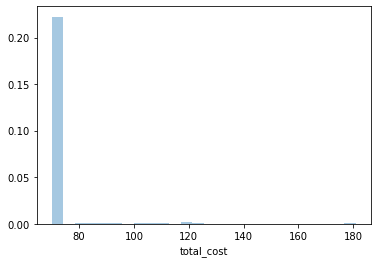

In [21]:
sns.distplot(total.query('tariff=="ultimate"')['total_cost'])
print(total.query('tariff=="ultimate"')['total_cost'].mean(),total.query('tariff=="ultimate"')['total_cost'].std(),
      total.query('tariff=="ultimate"')['total_cost'].median())

The main observation is that in both groups users behaviour is more or less the same: the amount of messages, calls and gbs do not differ much. The histograms for the mean value of calls per surf tariff is within the plan's limit (427). It means that part of the users try to stay within the calls limit per month, same with the internet consumption (16gb) and messages(31). Whereas the "ultimate" users call less (428), messages (37) and gb(17). The profitability graphs show big distribution peaks for "surf" users at 20, still median is 37 and mean 58. Some of the surfers use too much expensive internet.
For the "ultimate" users the peak is 70, because the limits are high and most of them pay only monthly fee. Still the mean is 72, it means that additional payment is driven with the internet cost per each GB above the limit. The quantity of users paying for the additional internet in "surf" group is much higher than those from the "ultimate" population.

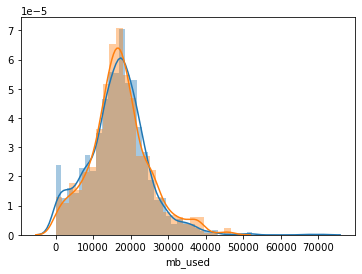

In [22]:
ax = sns.distplot(total.query('tariff=="surf"')['mb_used'])
sns.distplot(total.query('tariff=="ultimate"')['mb_used'], ax=ax)

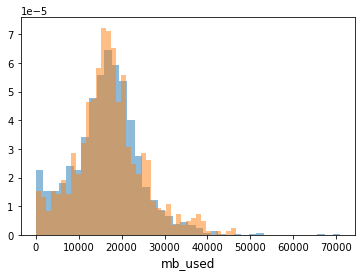

In [23]:
plt.hist(total.query('tariff=="surf"')['mb_used'], density=True, alpha=0.5, bins=40)
plt.hist(total.query('tariff=="ultimate"')['mb_used'], density=True, alpha=0.5, bins=40)
plt.xlabel('mb_used', fontsize=12)
plt.show()

The next block is optional. I thought that it would be better to take mean of all months **per user** for calls, messages and mb, and then compare them between the users. 
I grouped the means per user per city to see the distribution.

55.513781815202144 43.27436306503601 43.2


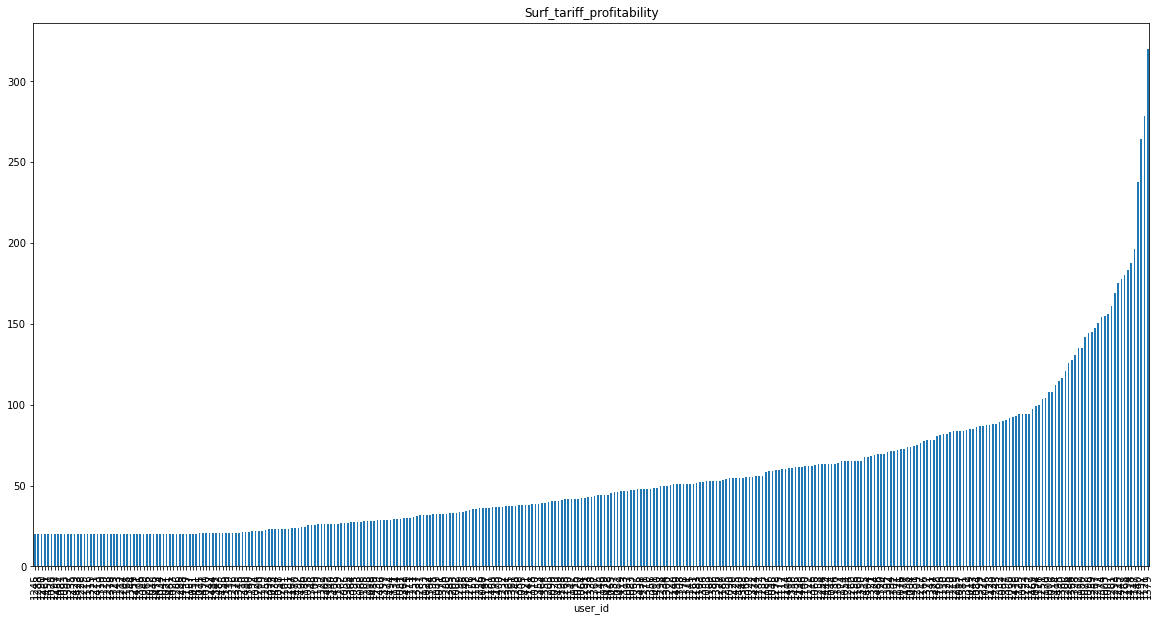

In [24]:
surf_tariff_per_user=total.query('tariff=="surf"').groupby('user_id')['total_cost'].mean().sort_values(ascending=True)
print(surf_tariff_per_user.mean(), surf_tariff_per_user.std(),surf_tariff_per_user.median())
surf_tariff_per_user.plot(kind="bar", fontsize=10, figsize=(20,10), 
                          title='Surf_tariff_profitability')



71.65915464740574 7.036785492685402 70.0


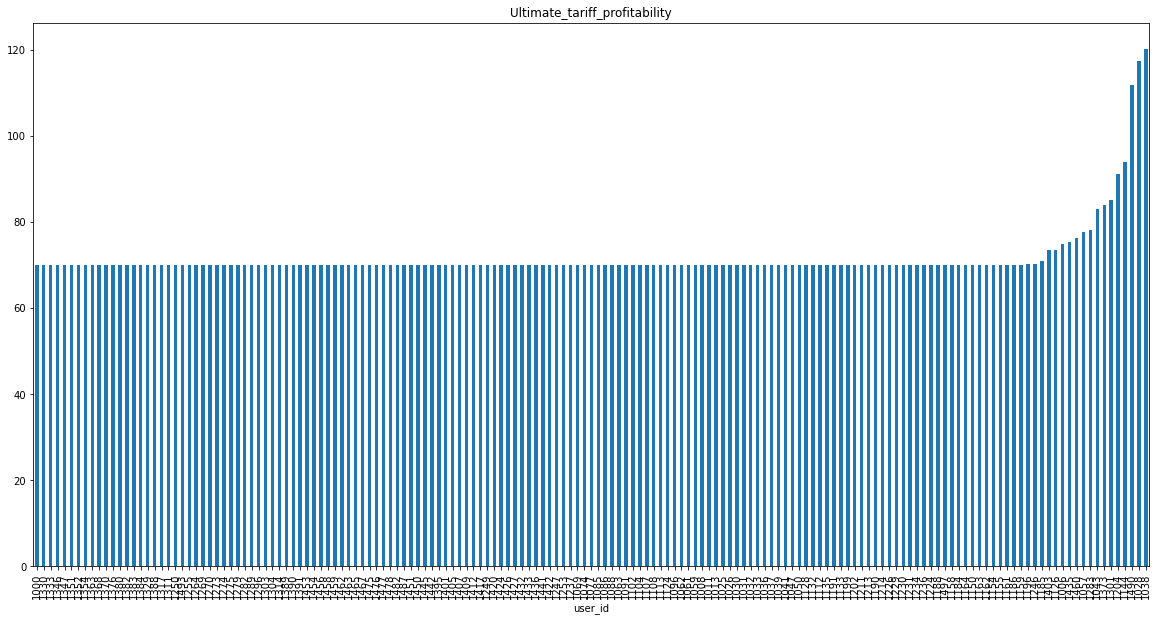

In [25]:
unlimate_tariff_per_user=total.query('tariff=="ultimate"').groupby('user_id')['total_cost'].mean().sort_values(ascending=True)
print(unlimate_tariff_per_user.mean(), unlimate_tariff_per_user.std(),unlimate_tariff_per_user.median())
unlimate_tariff_per_user.plot(kind="bar", fontsize=10, figsize=(20,10), title='Ultimate_tariff_profitability')

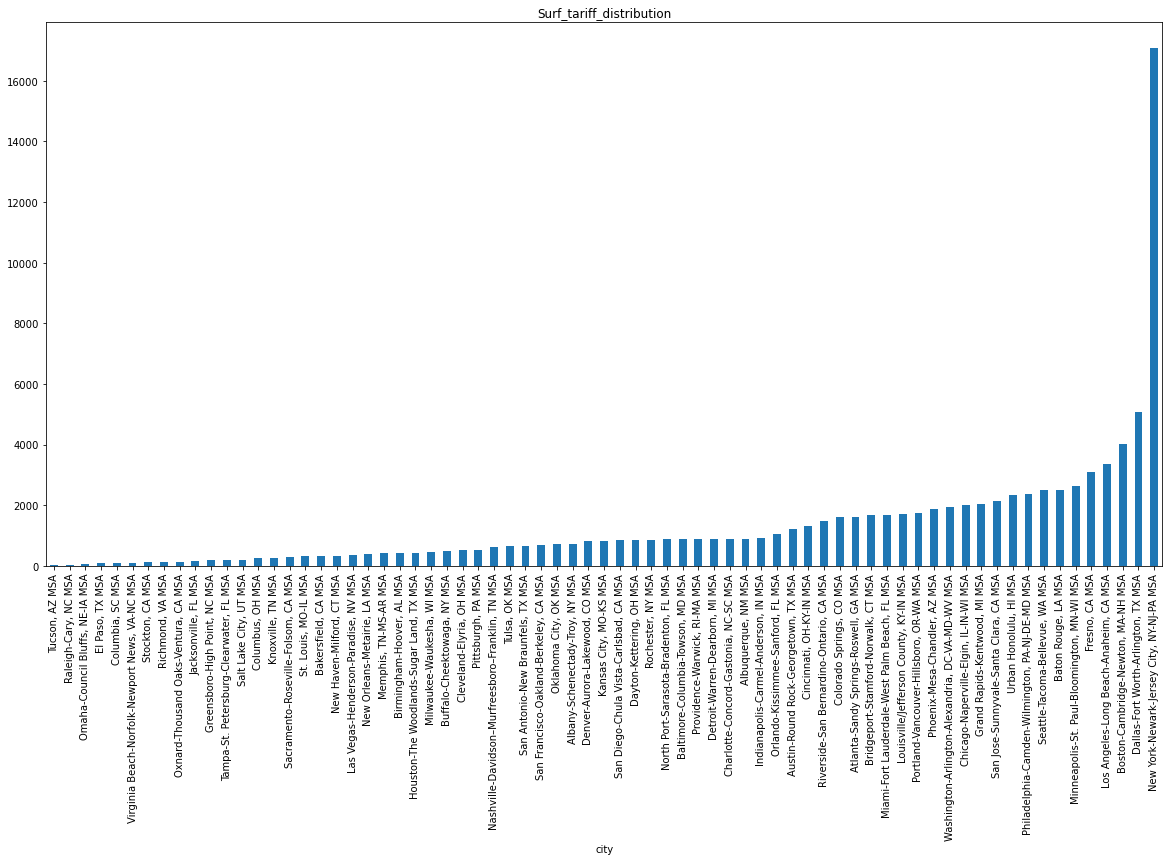

In [26]:
#distribution per cities
surf_tariff_per_city=total.query('tariff=="surf"').groupby('city')['total_cost'].sum().sort_values(ascending=True)
surf_tariff_per_city.plot(kind="bar", fontsize=10, figsize=(20,10), title='Surf_tariff_distribution')


was just curious about the users distribution per cities as we have a hypothesis to test on NY and NJ areas

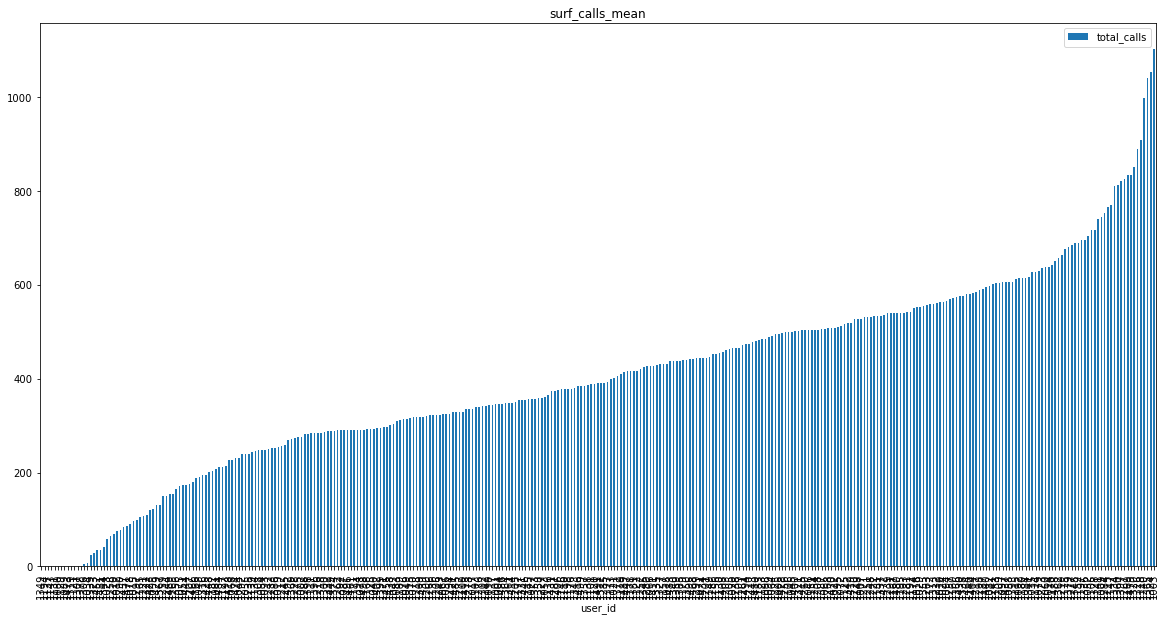

In [27]:
#testing the results of the calls,texts, mb per each tariff: mean, variance, standard deviation
surf = total.query('tariff=="surf"')
mean_calls = surf.pivot_table(index=['user_id'], values='total_calls', aggfunc='mean').sort_values(by='total_calls', ascending=True)
mean_calls.plot(kind='bar', fontsize=10, figsize=(20,10), title='surf_calls_mean')



The mean of the mean per user gives profitability of 27 and 70 of surf and ultimate tariffs. The mean through all users and months shows 28 and 70. Not much difference

In [28]:
print(mean_calls.mean()) #412
print(np.var(mean_calls)) #38571
print(np.std(mean_calls)) #196
print(np.sqrt(np.var(mean_calls))) #196


total_calls    401.502754
dtype: float64
total_calls    41831.889771
dtype: float64
total_calls    204.528457
dtype: float64
total_calls    204.528457
dtype: float64


The optional part showed that there is not much difference between getting mean of all months and all users or grouping months per users and getting mean of the users mean. Still I consider it is more precise.

#### 2 Test the hypotheses

<span style='color:blue'>Now we shall test the hypothesis: The average profit from users of Ultimate and Surf calling plans differs.</span>

In [29]:

from scipy import stats as st
sample_1 = total.query('tariff=="surf"')['total_cost'] # sample_1 is the sample from the first statistical population
sample_2 = total.query('tariff=="ultimate"')['total_cost'] # sample_2 is the sample from the second statistical population
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
# equal_var defines whether or not the variances of the samples are considered equal;
# default value is True

print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  2.4578744853550116e-13
We reject the null hypothesis


The null hupothesis is that the means of the two data samples are the same. The alternative hypothesis is that they differ. Let us set 𝛼 as 0.05. After using the scipy method we received p-value. It is extreemly small and we can reject the null hypothesis.
The data is not contradicting our alternative hypothesis that the average profit from users of Ultimate and Surf calling plans differ.

<span style='color:blue'>The next hypothesis: The average profit from users in NY and NJ area is different from that of the
users from other regions.</span>

In [30]:
sample_20 = total.groupby('city')
sample_21 = sample_20.get_group('New York-Newark-Jersey City, NY-NJ-PA MSA')['total_cost'] # sample_1 is the sample from the first statistical population
sample_22 = total.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_cost'] # sample_2 is the sample from the second statistical population
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
# equal_var defines whether or not the variances of the samples are considered equal;
# default value is True
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  2.4578744853550116e-13
We reject the null hypothesis


The null hupothesis is that the means of the two data samples are the same. The alternative hypothesis is that they differ. Let us set 𝛼 as 0.05. After using the scipy method we received p-value. It is extreemly small and we can reject the null hypothesis.
The data is not contradicting our alternative hypothesis that the average profit from users in NY and NJ area is different from that of the users from other regions.

#### 3 Hypotheses explaination

To support our alternative hypothesis that the average profit from the users of two tariff plans differ and profits for users in 'NY-NJ' and other cities differ we used the t-test approach. It helped us to figure out that the samples of the populations we used are not similar.
So, we drop the null hypothesis and can be sure that the data is not contradicting our alternative hypothesis.

In [206]:
total_profit_surf = total.query('tariff=="surf"')['total_cost'].sum()
total_profit_u = total.query('tariff=="ultimate"')['total_cost'].sum()
print(total_profit_surf, total_profit_u)
#total income for the 500 users

44947.43 50967.0


### III Conclusion


We received five data sets with information on the users, tarif plans and the actual usage of calls,messages and gbs of internet traffic.
As an analyst of the project I had to analyze clients' behavior and determine which prepaid plan is more profitable.
Firstly, I checked the data and changed the data types, then I merged the dataframes and created a united dataframe. After that I added the column, calculating the total cost of the services for the user per months.
The data was ready to analyse and I built a strem of histograms showing the users' behaviour per tariff plans.
As it turned out the behaviour was approximately similar. On average customers use equal amount of calls (less than 500), messages(less than 50) and internet traffic(16-17gb) per month. The most profitable for the provider is internet, because some users override the traffic limit and pay additional fee over their monthly payment. Although for the "surf" tariff users it is not uncommon to override their calls and messages limit as well. Whereas for the "ultimate" users only additional charges for the internet consumption over limit occur.
The profit per user is average 71 and for the surf tariff plan 58. For the marketing department I would recommend to invest to the commercial and advertizing of the ultimate tariff plan.